# The Complete Pokemon Dataset

## 1. Problem Definition

Con este dataset, es posible cumplir con (Vease Evaluation)

## 2. Data

This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon. The information contained in this dataset include Base Stats, Performance against Other Types, Height, Weight, Classification, Egg Steps, Experience Points, Abilities, etc. The information was scraped from http://serebii.net/


## 3. Evaluation

Questions to solve:

    * Is it possible to build a classifier to identify legendary Pokemon?
    * How does height and weight of a Pokemon correlate with its various base stats?
    * What factors influence the Experience Growth and Egg Steps? Are these quantities correlated?
    * Which type is the strongest overall? Which is the weakest?
    * Which type is the most likely to be a legendary Pokemon?
    * Can you build a Pokemon dream team? A team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon.

## 4. Features

* name: The English name of the Pokemon
* japanese_name: The Original Japanese name of the Pokemon
* pokedex_number: The entry number of the Pokemon in the National Pokedex
* percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
* type1: The Primary Type of the Pokemon
* type2: The Secondary Type of the Pokemon
* classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
* height_m: Height of the Pokemon in metres
* weight_kg: The Weight of the Pokemon in kilograms
* capture_rate: Capture Rate of the Pokemon
* baseeggsteps: The number of steps required to hatch an egg of the Pokemon
* abilities: A stringified list of abilities that the Pokemon is capable of having
* experience_growth: The Experience Growth of the Pokemon
* base_happiness: Base Happiness of the Pokemon
* against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
* hp: The Base HP of the Pokemon
* attack: The Base Attack of the Pokemon
* defense: The Base Defense of the Pokemon
* sp_attack: The Base Special Attack of the Pokemon
* sp_defense: The Base Special Defense of the Pokemon
* speed: The Base Speed of the Pokemon
* generation: The numbered generation which the Pokemon was first introduced
* is_legendary: Denotes if the Pokemon is legendary.

## Preparing the tools

In [37]:
# Importando las herramientas que necesitamos:

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from scikit learn (Classification)
from sklearn.linear_model import LogisticRegression      # LogisticRegression

from sklearn.neighbors import KNeighborsClassifier       # KNN
from sklearn.ensemble import BaggingClassifier           # Bagging

from sklearn.ensemble import RandomForestClassifier      # Random Forest
from sklearn.ensemble import ExtraTreesClassifier        # Extra Trees

from sklearn.ensemble import AdaBoostClassifier         # Ada Boost
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting

from sklearn.experimental import enable_hist_gradient_boosting    # Histogram-Based Gradient Boosting
from sklearn.ensemble import HistGradientBoostingClassifier       # 

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load the data

In [38]:
# Importamos la data:
df = pd.read_csv("pokemon.csv")

In [39]:
# Observamos la información
df.T

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']","['Torrent', 'Rain Dish']","['Torrent', 'Rain Dish']","['Torrent', 'Rain Dish']","['Shield Dust', 'Run Away']",...,['Shadow Shield'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Prism Armor'],['Soul-Heart']
against_bug,1,1,1,0.5,0.5,0.25,1,1,1,1,...,1,0.5,0.5,0.5,1,0.25,1,2,2,0.25
against_dark,1,1,1,1,1,1,1,1,1,1,...,4,1,0.5,0.5,1,1,1,0.5,2,0.5
against_dragon,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.5,0.5,2,1,0
against_electric,0.5,0.5,0.5,1,1,2,2,2,2,1,...,1,1,1,1,0.5,2,0.5,0.5,1,1
against_fairy,0.5,0.5,0.5,0.5,0.5,0.5,1,1,1,1,...,1,0.5,2,2,1,0.5,0.5,4,1,0.5
against_fight,0.5,0.5,0.5,1,1,0.5,1,1,1,0.5,...,0,1,0.5,0.5,1,1,2,2,0.5,1
against_fire,2,2,2,0.5,0.5,0.5,0.5,0.5,0.5,2,...,1,0.5,2,2,1,2,4,0.5,1,2
against_flying,2,2,2,1,1,1,1,1,1,2,...,1,0.5,4,4,0.5,0.5,1,1,1,0.5
against_ghost,1,1,1,1,1,1,1,1,1,1,...,4,1,1,1,1,1,1,0.5,2,1


In [40]:
# Verificamos si falta información
#df.info()
df.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


Faltan valores en:
* height_m
* percentage_male
* type_2
* weight_kg

Crearemos una copia del dataframe donde rellenaremos estos datos y pasaremos todo a valores numéricos para así poder trabajarlo de manera correcta.

In [41]:
# Copia del dataframe:
df_tmp = df.copy()
df_tmp.head().T

,0,1,2,3,4
abilities,"['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Overgrow', 'Chlorophyll']","['Blaze', 'Solar Power']","['Blaze', 'Solar Power']"
against_bug,1,1,1,0.5,0.5
against_dark,1,1,1,1,1
against_dragon,1,1,1,1,1
against_electric,0.5,0.5,0.5,1,1
against_fairy,0.5,0.5,0.5,0.5,0.5
against_fight,0.5,0.5,0.5,1,1
against_fire,2,2,2,0.5,0.5
against_flying,2,2,2,1,1
against_ghost,1,1,1,1,1


Observamos los valores restantes, analizamos y decidimos la manera correcta de rellenarlos.

## Fill missing values

**height_m**

In [42]:
# Total de valores faltantes en height_m
# df_tmp[df_tmp["height_m"].isna()].T
df_tmp["height_m"].isna().sum()

20

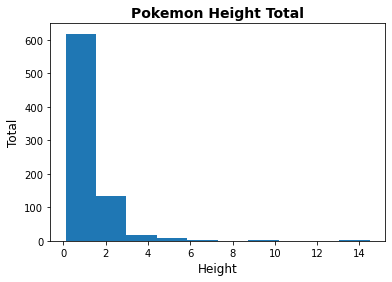

In [43]:
# Plot para observar variaciones
df_tmp["height_m"].plot(kind="hist")
plt.title("Pokemon Height Total", fontsize=14, fontweight="bold")
plt.xlabel("Height", fontsize=12)
plt.ylabel("Total", fontsize=12);

In [44]:
# POdemos aproximar la mediana de la siguiente manera:
df_tmp["height_m"].median()

# También así
#m = df_tmp["height_m"].sort_values().dropna()
#m[ int(len(h)/2)-3 : int(len(h)/2)+3 ]

1.0

No podemos rellenar con un simple promedio, debido a que las alturas muy altas desvían demasiado al resultado general. Por eso, llenaremos los restantes con la "Mediana", que es menos sensible a errores extremos.

**percentage_male**

In [45]:
# Total de valores faltantes en percentage_male
#df_tmp[df_tmp["percentage_male"].isna()].T
df_tmp["percentage_male"].isna().sum()

98

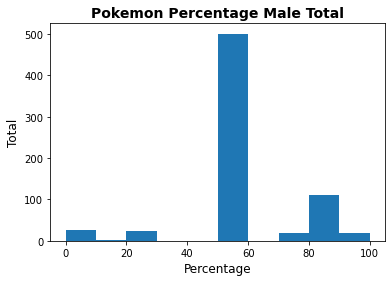

In [46]:
# Plot para observar variaciones
df_tmp["percentage_male"].plot(kind="hist")
plt.title("Pokemon Percentage Male Total", fontsize=14, fontweight="bold")
plt.xlabel("Percentage", fontsize=12)
plt.ylabel("Total", fontsize=12);

In [47]:
# Mediana:
df_tmp["percentage_male"].median()

# También así:
#m = df_tmp["percentage_male"].sort_values().dropna()
#m[ int(len(h)/2)-3 : int(len(h)/2)+3 ]

50.0

De igual forma, podemos rellenarla con la mediana.

**type2**

In [48]:
# Total de valores faltantes en type2
#df_tmp[df_tmp["type2"].isna()].T
df_tmp["type2"].isna().sum()

384

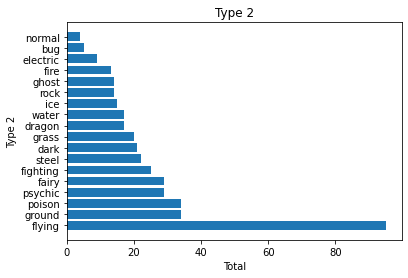

In [49]:
# Plot para observar variaciones
fig, ax = plt.subplots()

ax.barh(y=df_tmp["type2"].value_counts().keys(),
        width=df_tmp["type2"].value_counts().values);
ax.set(title="Type 2",
        xlabel="Total",
        ylabel="Type 2");

Aquí no necesitamos rellenar más que con tipo "None", es decir, de ninguno.

**weight_kg**

In [50]:
# Total de valores faltantes en type2
#df_tmp[df_tmp["weight_kg"].isna()].T

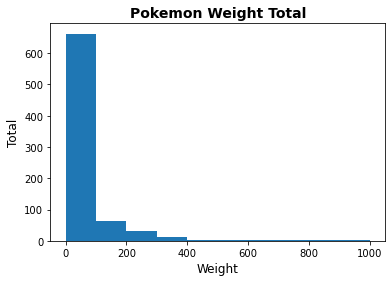

In [51]:
# Plot para observar variaciones
df_tmp["weight_kg"].plot(kind="hist")
plt.title("Pokemon Weight Total", fontsize=14, fontweight="bold")
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Total", fontsize=12);

In [52]:
# Mediana
df_tmp["weight_kg"].median()

#Tambien así:
#m = df_tmp["weight_kg"].sort_values().dropna()
#m[ int(len(h)/2)-3 : int(len(h)/2)+3 ]

27.3

De igual forma podemos rellenar con la mediana.

En conclusión:

    Rellenaremos con la mediana: height_m, percentage_male y weight_kg.
    Rellenaremos con None: type_2.

In [53]:
# FILL MISSING VALUES

# height_m con la mediana
df_tmp["height_m"].fillna(df_tmp["height_m"].median(),
                          inplace=True)

# percentage_male con la mediana
df_tmp["percentage_male"].fillna(df_tmp["percentage_male"].median(),
                          inplace=True)

# weight_kg con la mediana
df_tmp["weight_kg"].fillna(df_tmp["weight_kg"].median(),
                          inplace=True)

# type2 con None
df_tmp["type2"].fillna("None", 
                       inplace=True)

In [54]:
df_tmp.tail(20).T

,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800
abilities,"['Bulletproof', 'Soundproof', 'Overcoat']","['Bulletproof', 'Soundproof', 'Overcoat']","['Bulletproof', 'Soundproof', 'Overcoat']","['Electric Surge', 'Telepathy']","['Psychic Surge', 'Telepathy']","['Grassy Surge', 'Telepathy']","['Misty Surge', 'Telepathy']",['Unaware'],['Sturdy'],['Full Metal Body'],['Shadow Shield'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Beast Boost'],['Prism Armor'],['Soul-Heart']
against_bug,1,0.5,0.5,0.5,1,1,0.5,2,2,1,1,0.5,0.5,0.5,1,0.25,1,2,2,0.25
against_dark,1,0.5,0.5,0.5,1,0.5,0.5,2,2,2,4,1,0.5,0.5,1,1,1,0.5,2,0.5
against_dragon,2,2,2,0,0,0,0,1,1,0.5,1,1,1,1,1,0.5,0.5,2,1,0
against_electric,0.5,0.5,0.5,0.5,1,0.5,2,1,1,1,1,1,1,1,0.5,2,0.5,0.5,1,1
against_fairy,2,4,4,1,1,1,1,1,1,0.5,1,0.5,2,2,1,0.5,0.5,4,1,0.5
against_fight,1,1,1,0.5,0.25,0.5,0.5,0.5,0.5,1,0,1,0.5,0.5,1,1,2,2,0.5,1
against_fire,0.5,0.5,0.5,1,1,2,0.5,1,1,2,1,0.5,2,2,1,2,4,0.5,1,2
against_flying,1,2,2,0.5,1,2,1,1,1,0.5,1,0.5,4,4,0.5,0.5,1,1,1,0.5
against_ghost,1,1,1,1,2,1,1,2,2,2,4,1,1,1,1,1,1,0.5,2,1


In [55]:
df_tmp.isna().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

Ahora podemos convertir la data no numérica en data numérica para el correcto análisis.

## Turn no numerical data into numbers

In [163]:
# Strings en categorias
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [164]:
# Se observan las nuevas categorias
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   abilities          801 non-null    category
 1   against_bug        801 non-null    float64 
 2   against_dark       801 non-null    float64 
 3   against_dragon     801 non-null    float64 
 4   against_electric   801 non-null    float64 
 5   against_fairy      801 non-null    float64 
 6   against_fight      801 non-null    float64 
 7   against_fire       801 non-null    float64 
 8   against_flying     801 non-null    float64 
 9   against_ghost      801 non-null    float64 
 10  against_grass      801 non-null    float64 
 11  against_ground     801 non-null    float64 
 12  against_ice        801 non-null    float64 
 13  against_normal     801 non-null    float64 
 14  against_poison     801 non-null    float64 
 15  against_psychic    801 non-null    float64 
 16  against_

In [165]:
# Categorias en números
for label, content in df_tmp.items():
    if pd.api.types.is_categorical_dtype(content):
        df_tmp[label] = pd.Categorical(content).codes + 1

In [167]:
df_tmp.T

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
abilities,244.00,244.00,244.00,22.0,22.0,22.00,453.0,453.0,453.0,348.0,...,333.0,12.00,12.0,12.0,12.0,12.00,12.00,12.0,289.0,359.00
against_bug,1.00,1.00,1.00,0.5,0.5,0.25,1.0,1.0,1.0,1.0,...,1.0,0.50,0.5,0.5,1.0,0.25,1.00,2.0,2.0,0.25
against_dark,1.00,1.00,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,...,4.0,1.00,0.5,0.5,1.0,1.00,1.00,0.5,2.0,0.50
against_dragon,1.00,1.00,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,...,1.0,1.00,1.0,1.0,1.0,0.50,0.50,2.0,1.0,0.00
against_electric,0.50,0.50,0.50,1.0,1.0,2.00,2.0,2.0,2.0,1.0,...,1.0,1.00,1.0,1.0,0.5,2.00,0.50,0.5,1.0,1.00
against_fairy,0.50,0.50,0.50,0.5,0.5,0.50,1.0,1.0,1.0,1.0,...,1.0,0.50,2.0,2.0,1.0,0.50,0.50,4.0,1.0,0.50
against_fight,0.50,0.50,0.50,1.0,1.0,0.50,1.0,1.0,1.0,0.5,...,0.0,1.00,0.5,0.5,1.0,1.00,2.00,2.0,0.5,1.00
against_fire,2.00,2.00,2.00,0.5,0.5,0.50,0.5,0.5,0.5,2.0,...,1.0,0.50,2.0,2.0,1.0,2.00,4.00,0.5,1.0,2.00
against_flying,2.00,2.00,2.00,1.0,1.0,1.00,1.0,1.0,1.0,2.0,...,1.0,0.50,4.0,4.0,0.5,0.50,1.00,1.0,1.0,0.50
against_ghost,1.00,1.00,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,...,4.0,1.00,1.0,1.0,1.0,1.00,1.00,0.5,2.0,1.00


### Save preprocessed data

In [168]:
df_tmp.to_csv("pokemon_filled_num.csv", index=False)

### Load preprocessed data

In [2]:
df_new = pd.read_csv("pokemon_filled_num.csv")
df_new.T

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
abilities,244.00,244.00,244.00,22.0,22.0,22.00,453.0,453.0,453.0,348.0,...,333.0,12.00,12.0,12.0,12.0,12.00,12.00,12.0,289.0,359.00
against_bug,1.00,1.00,1.00,0.5,0.5,0.25,1.0,1.0,1.0,1.0,...,1.0,0.50,0.5,0.5,1.0,0.25,1.00,2.0,2.0,0.25
against_dark,1.00,1.00,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,...,4.0,1.00,0.5,0.5,1.0,1.00,1.00,0.5,2.0,0.50
against_dragon,1.00,1.00,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,...,1.0,1.00,1.0,1.0,1.0,0.50,0.50,2.0,1.0,0.00
against_electric,0.50,0.50,0.50,1.0,1.0,2.00,2.0,2.0,2.0,1.0,...,1.0,1.00,1.0,1.0,0.5,2.00,0.50,0.5,1.0,1.00
against_fairy,0.50,0.50,0.50,0.5,0.5,0.50,1.0,1.0,1.0,1.0,...,1.0,0.50,2.0,2.0,1.0,0.50,0.50,4.0,1.0,0.50
against_fight,0.50,0.50,0.50,1.0,1.0,0.50,1.0,1.0,1.0,0.5,...,0.0,1.00,0.5,0.5,1.0,1.00,2.00,2.0,0.5,1.00
against_fire,2.00,2.00,2.00,0.5,0.5,0.50,0.5,0.5,0.5,2.0,...,1.0,0.50,2.0,2.0,1.0,2.00,4.00,0.5,1.0,2.00
against_flying,2.00,2.00,2.00,1.0,1.0,1.00,1.0,1.0,1.0,2.0,...,1.0,0.50,4.0,4.0,0.5,0.50,1.00,1.0,1.0,0.50
against_ghost,1.00,1.00,1.00,1.0,1.0,1.00,1.0,1.0,1.0,1.0,...,4.0,1.00,1.0,1.0,1.0,1.00,1.00,0.5,2.0,1.00


**Question 1: Is it possible to build a classifier to identify legendary Pokemon?**

Podemos observar la matrix de correlación e inferir algunas deducciones:

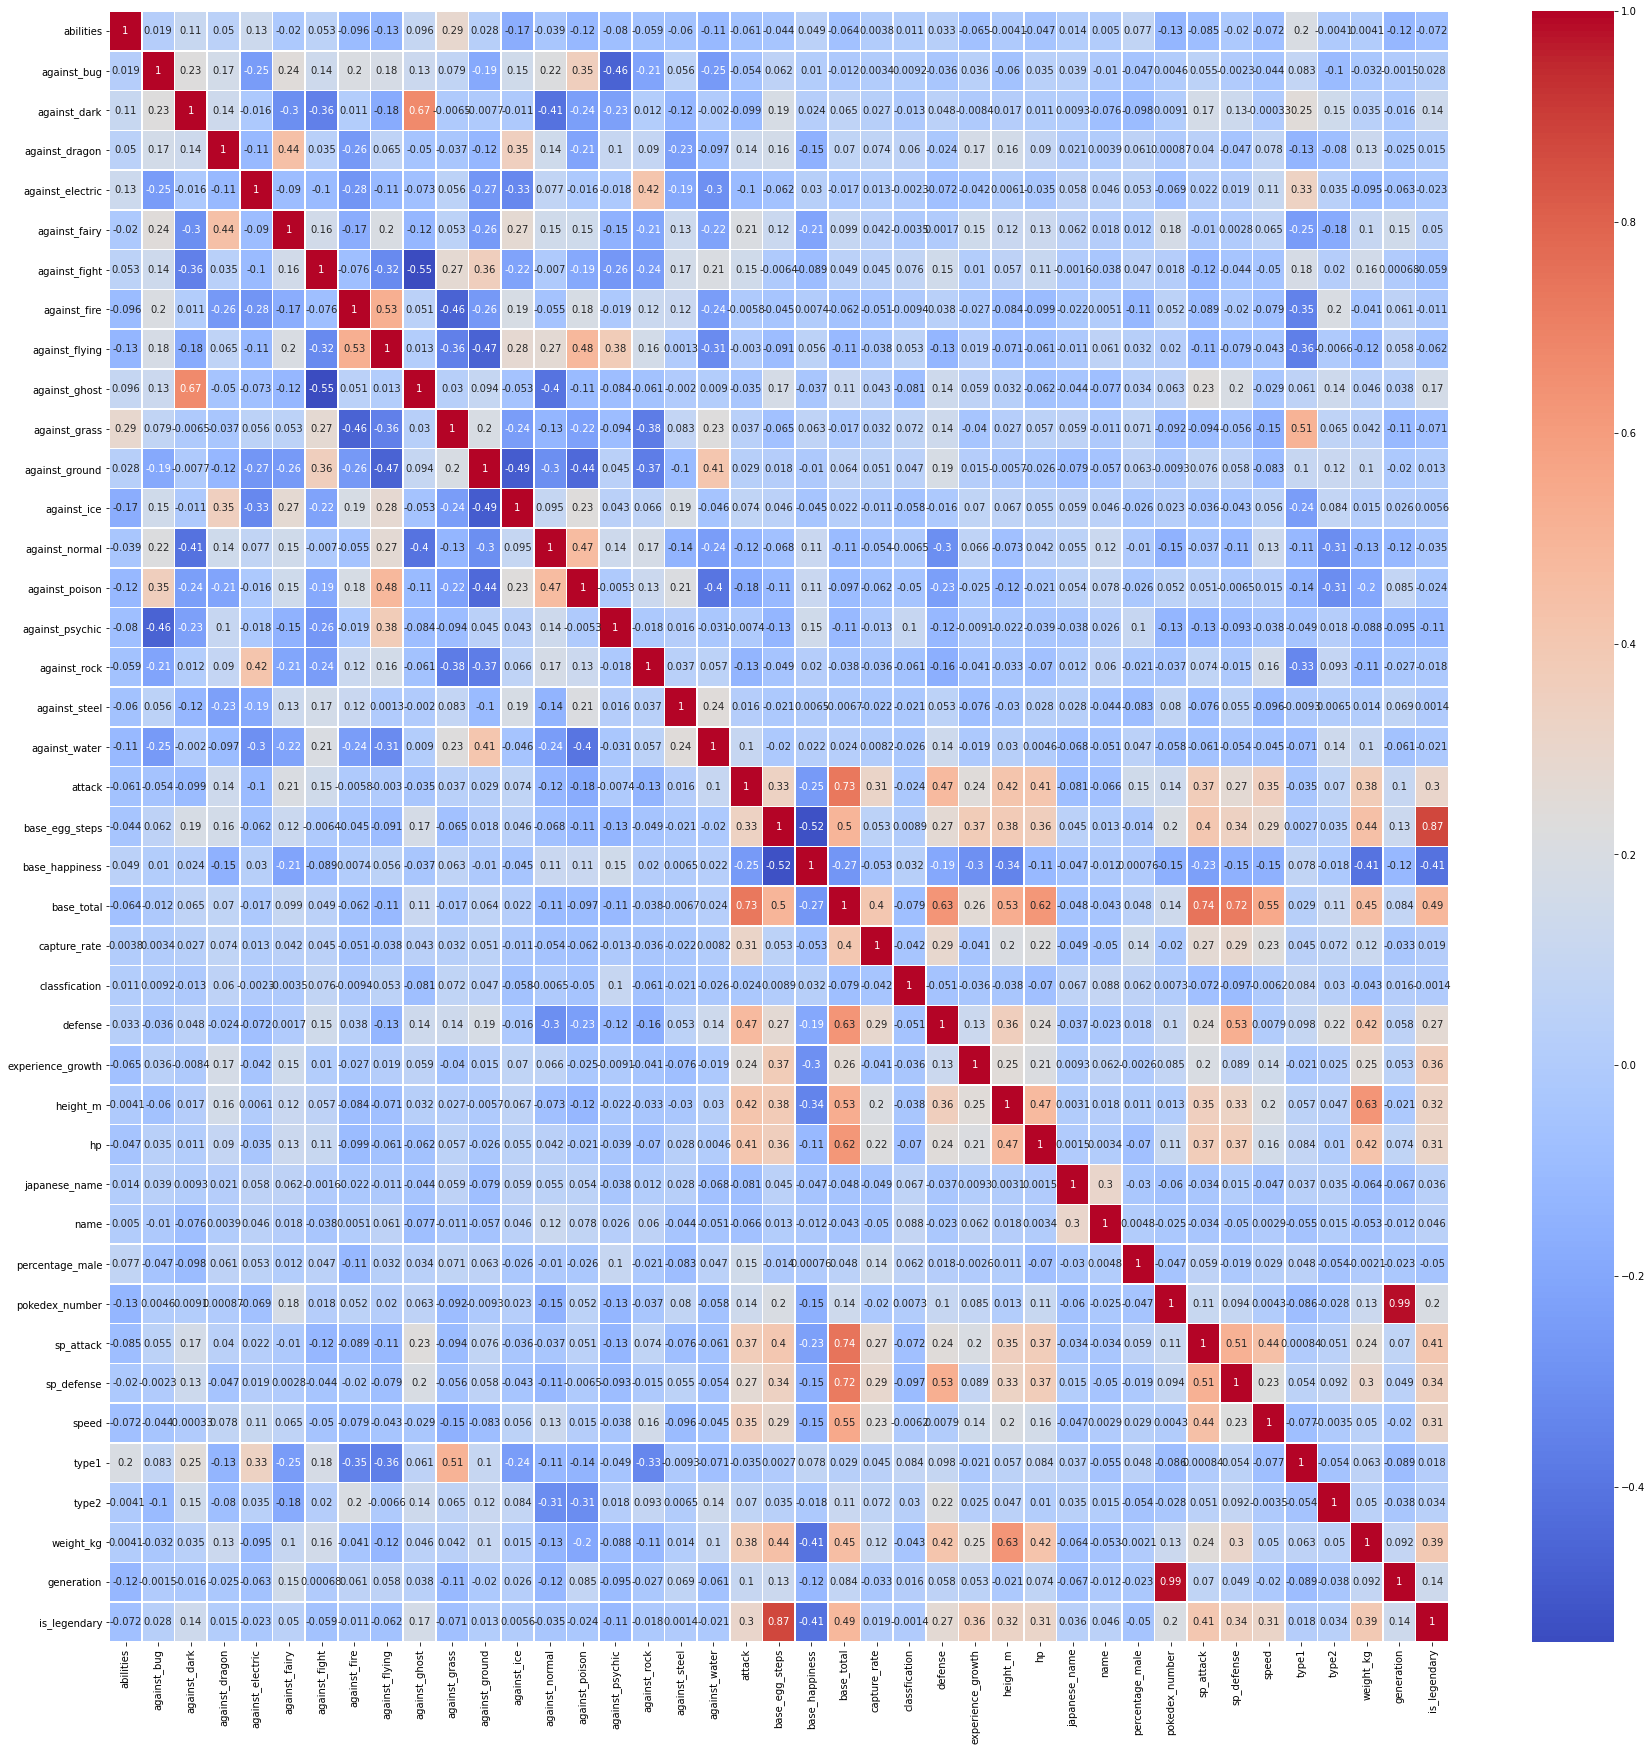

In [3]:
corr_mat = df_new.corr()
fig, ax = plt.subplots(figsize=(30, 30))
ax = sns.heatmap(corr_mat, 
                 annot=True, 
                 linewidth=0.5, 
                 cmap="coolwarm")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0);

Dada la matrix de correlación, podemos observar cuales features influyen más en si un pokemon es legendario o no.

Dicho esto, eliminaremos las columnas que no influyen lo suficiente (al menos 0.2), tomando en cuenta también nuestro conocimiento acerca de pokemon.

**Split the data**

In [4]:
# Columnas X por eliminar
drop_cols = ["abilities", "against_bug", "against_dark", "against_dragon", "against_electric", "against_fairy", 
             "against_fight", "against_fire", "against_flying", "against_ghost", "against_grass", "against_ground",
             "against_ice", "against_normal", "against_poison", "against_psychic", "against_rock", "against_steel",
             "against_water", "capture_rate", "classfication", "japanese_name", "percentage_male", "name", "type1",
             "type2", "generation"]
for_leg = df_new.drop(drop_cols, axis=1)

# Realmente esa más facil elegir solo las columnas con correlación mayor a 0.2 (equisde)
X = df_new[["attack", "base_egg_steps", "base_happiness", "base_total", 
           "defense", "experience_growth", "height_m", "hp", "pokedex_number",
           "sp_attack", "sp_defense", "speed", "weight_kg"]]
y = df_new["is_legendary"]

Podemos observar una mejor correlación tal que:

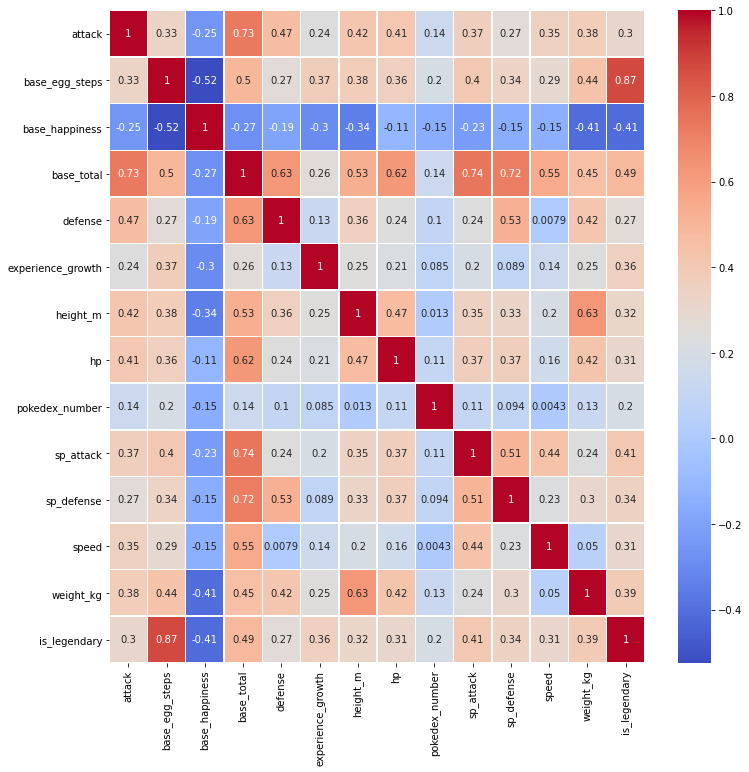

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(for_leg.corr(), 
                 annot=True, 
                 linewidth=0.5, 
                 cmap="coolwarm")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0);

In [6]:
# Data Split (Train & Test)
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# Put models into a dictionary
models = {"LogisticRegression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Bagging" : BaggingClassifier(),
          "RandomForest" : RandomForestClassifier(),
          "ExtraTrees" : ExtraTreesClassifier(),
          "AdaBoost" : AdaBoostClassifier(),
          "GradientBoosting" : GradientBoostingClassifier(),
          "HistGradientBoosting" : HistGradientBoostingClassifier()} 
models

{'LogisticRegression': LogisticRegression(),
 'KNN': KNeighborsClassifier(),
 'Bagging': BaggingClassifier(),
 'RandomForest': RandomForestClassifier(),
 'ExtraTrees': ExtraTreesClassifier(),
 'AdaBoost': AdaBoostClassifier(),
 'GradientBoosting': GradientBoostingClassifier(),
 'HistGradientBoosting': HistGradientBoostingClassifier()}

In [8]:
# Create a function to fin and score models
def fit_score(models, X_train, X_test, y_train, y_test):
    '''
    Fit and evaluate each model given the split data
    models: a dict of different Scikit-Learn Models
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: train labels
    y_test: test labels
    '''
    
    # Set Random Seed
    np.random.seed(42)
    
    # Dictionaty to keep model scores
    model_scores = {}
    
    # Loop models
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [9]:
fit_score(models, X_train, X_test, y_train, y_test)

C:\Users\Cerjio\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.9813664596273292,
 'KNN': 0.9813664596273292,
 'Bagging': 0.9937888198757764,
 'RandomForest': 0.9937888198757764,
 'ExtraTrees': 0.9937888198757764,
 'AdaBoost': 0.9875776397515528,
 'GradientBoosting': 0.9937888198757764,
 'HistGradientBoosting': 0.9937888198757764}

Se observa que todos los modelos son casi igual de buenos, así que por simplicidad (sin tunearlos), elegimos Random Forest.

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9937888198757764

Finalizado el modelo para definir Legendarios. Podemos observar los feature importances:

In [11]:
# Vamos a observar ahora los feature importances
# Creamos un dataframe con los feature importances
feat_imp = pd.DataFrame({"features": X.columns,
                         "feature_importances": model.feature_importances_})
# Ordenamos según los valores
feat_imp.sort_values("feature_importances", ascending=False, inplace=True)
# Reseteamos los index
feat_imp.reset_index(drop=True, inplace=True)

In [12]:
feat_imp

,features,feature_importances
0,base_egg_steps,0.386016
1,base_total,0.189658
2,base_happiness,0.093733
3,pokedex_number,0.062050
4,experience_growth,0.055743
5,height_m,0.039508
6,hp,0.033957
7,sp_attack,0.033729
8,weight_kg,0.032803
9,sp_defense,0.023340


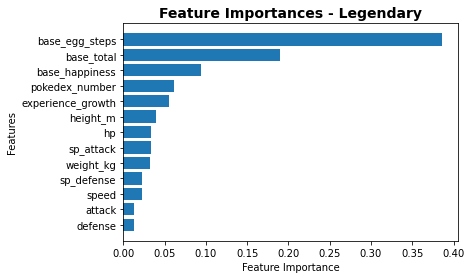

In [13]:
# Plot del feature importance
fig, ax = plt.subplots()
ax.barh(feat_imp["features"], feat_imp["feature_importances"])

ax.set_ylabel("Features")
ax.set_xlabel("Feature Importance")
ax.invert_yaxis()

plt.title("Feature Importances - Legendary", fontsize=14, fontweight="bold");

**Question 2: How does height and weight of a Pokemon correlate with its various base stats?**

Tenemos las variables base: 
* hp
* attack
* defense
* sp_attack
* sp_defense
* speed

In [14]:
base_stats = df_new[["hp", "attack", "defense", "sp_attack", "sp_defense", "speed", "height_m", "weight_kg"]]
base_stats

,hp,attack,defense,sp_attack,sp_defense,speed,height_m,weight_kg
0,45,49,49,65,65,45,0.7,6.9
1,60,62,63,80,80,60,1.0,13.0
2,80,100,123,122,120,80,2.0,100.0
3,39,52,43,60,50,65,0.6,8.5
4,58,64,58,80,65,80,1.1,19.0
...,...,...,...,...,...,...,...,...
796,97,101,103,107,101,61,9.2,999.9
797,59,181,131,59,31,109,0.3,0.1
798,223,101,53,97,53,43,5.5,888.0
799,97,107,101,127,89,79,2.4,230.0


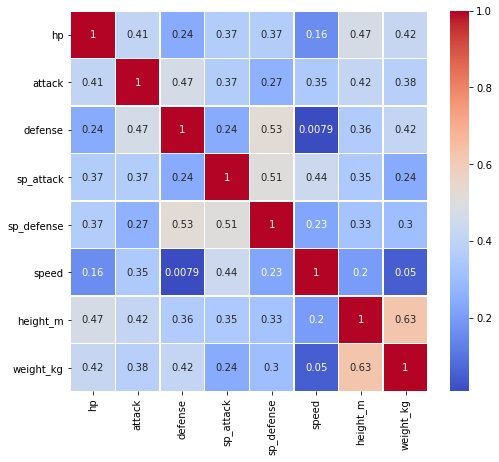

In [15]:
# Matriz de correlación
fig, ax = plt.subplots(figsize=(8, 7))
ax = sns.heatmap(base_stats.corr(), 
                 annot=True, 
                 linewidth=0.5, 
                 cmap="coolwarm")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0);

Se observa que height_m y weight_kg influyen casi de la misma manera con las estadísticas base. Podemos hacer un estudio individual.

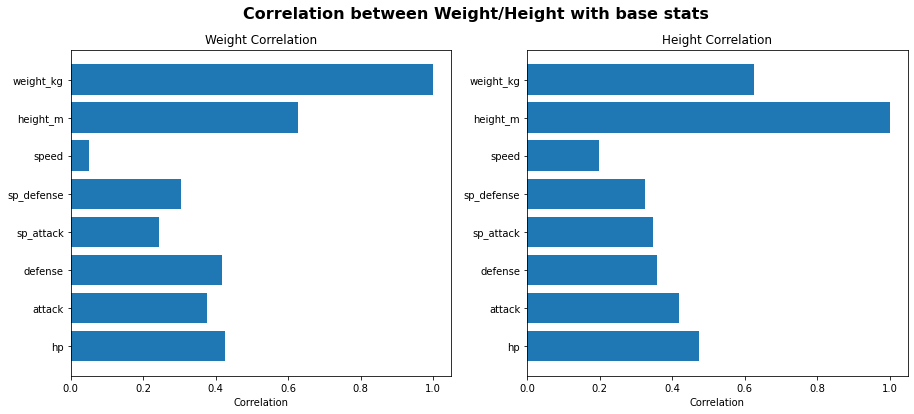

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

fig.suptitle("Correlation between Weight/Height with base stats",
             fontsize=16,
             fontweight="bold")

ax[0].barh(y=base_stats.corr()["weight_kg"].keys(), 
           width=base_stats.corr()["weight_kg"].values);
ax[0].set(title="Weight Correlation",
          xlabel="Correlation")

ax[1].barh(y=base_stats.corr()["height_m"].keys(), 
           width=base_stats.corr()["height_m"].values);
ax[1].set(title="Height Correlation",
          xlabel="Correlation");

**Question 3: What factors influence the Experience Growth and Egg Steps? Are these quantities correlated?**

Podemos observar nuevamente la correlación respecto a estos dos factores y extraer todos los que su valor absoluto es mayor a 0.2

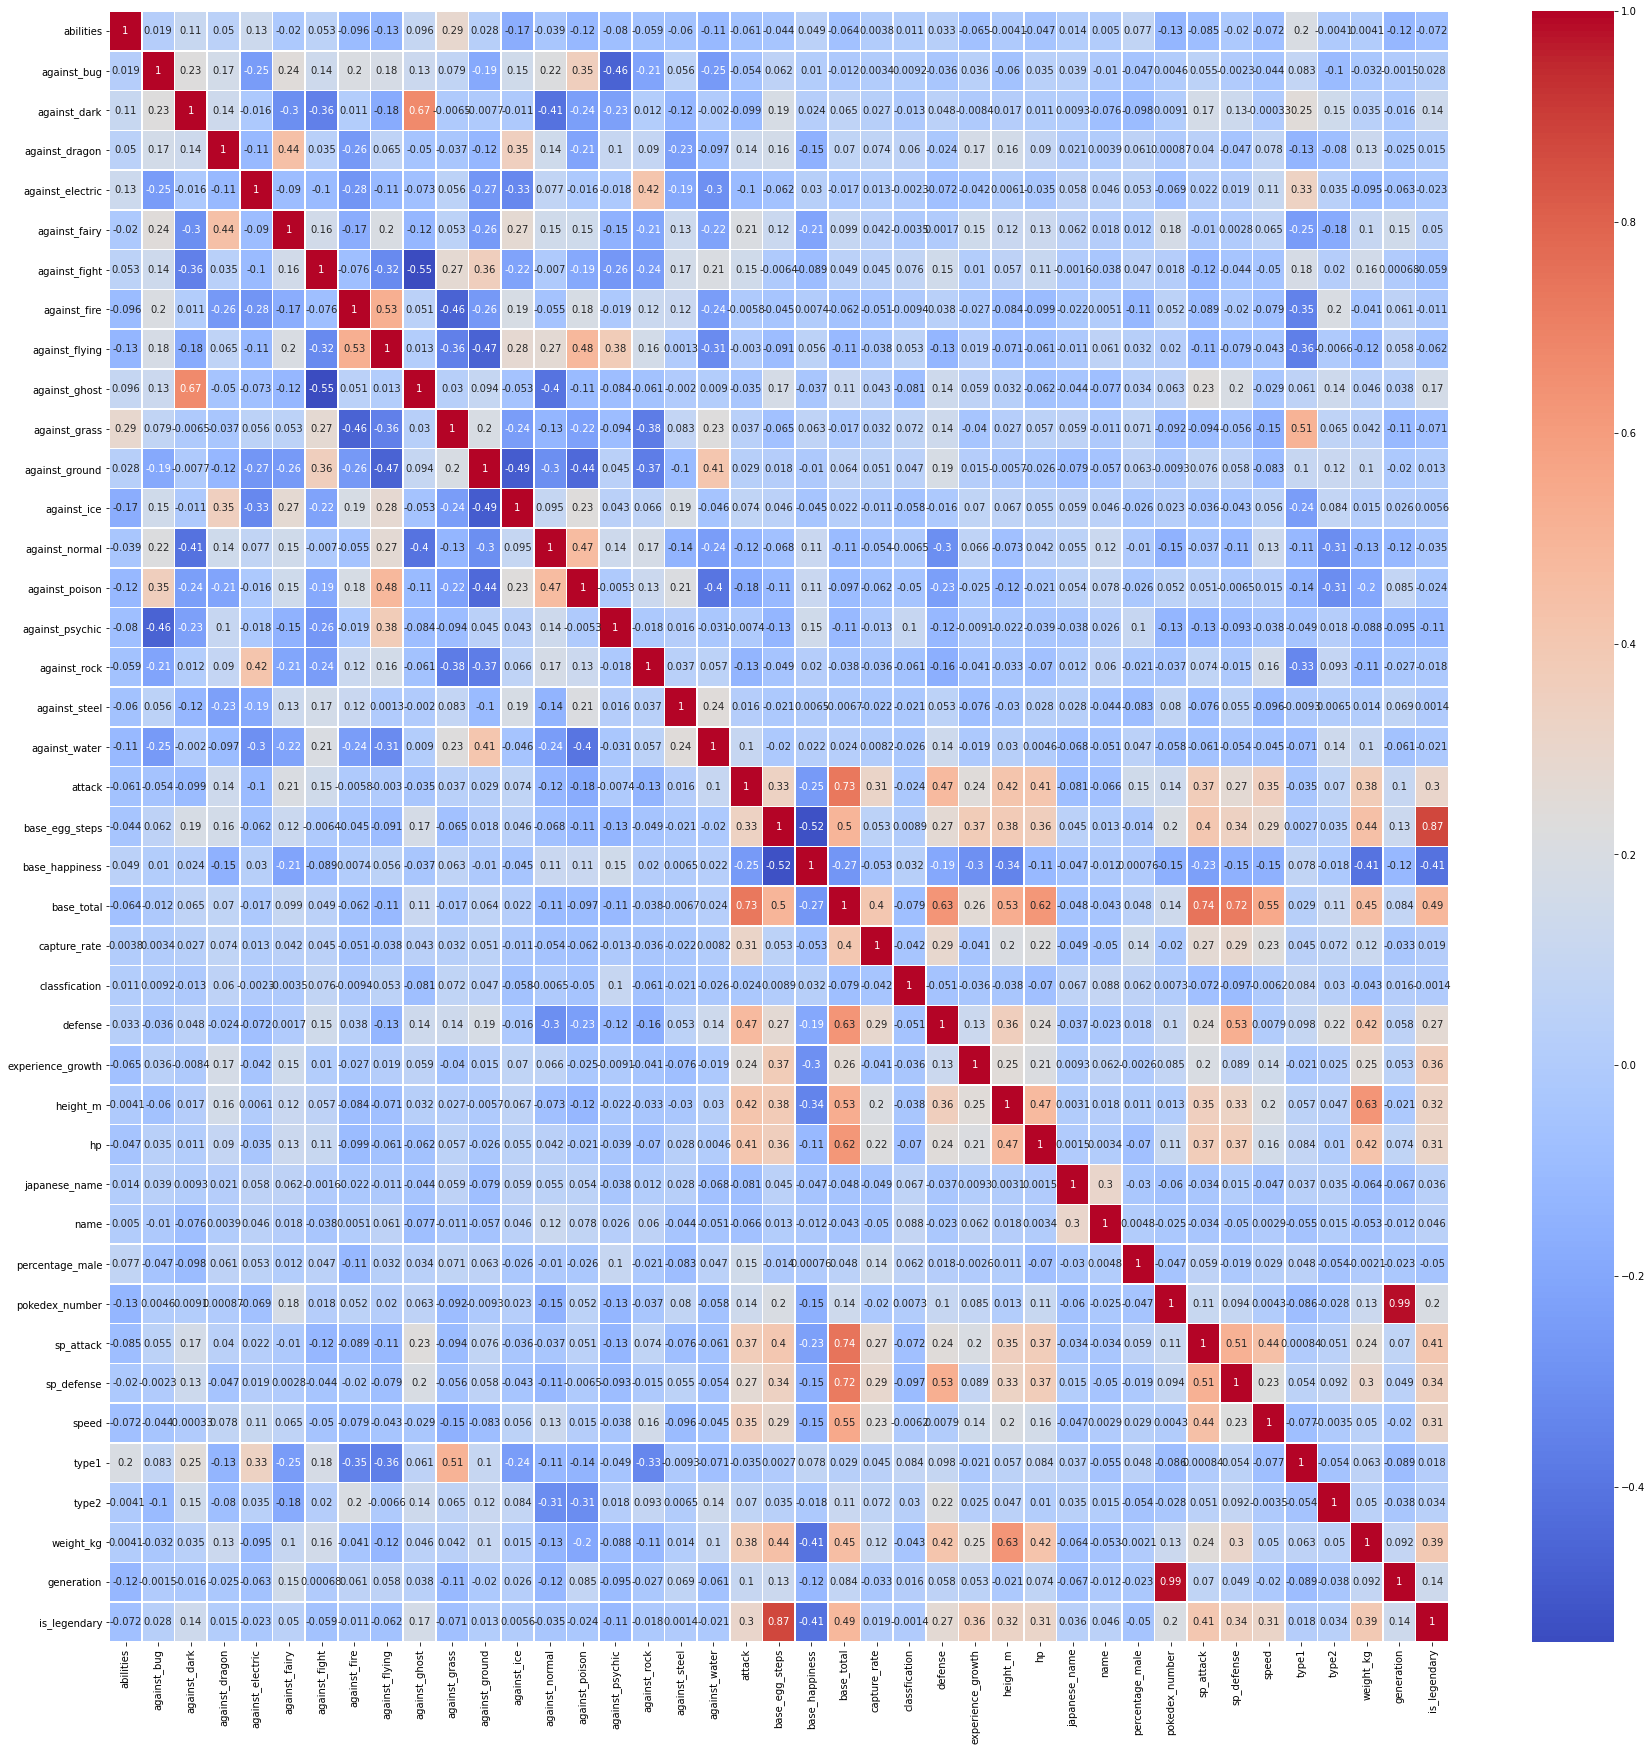

In [24]:
corr = df_new.corr()

fig, ax = plt.subplots(figsize=(30, 30))
ax = sns.heatmap(corr, 
                 annot=True, 
                 linewidth=0.5, 
                 cmap="coolwarm")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0);

Extraemos experience_growth:

In [22]:
corr["experience_growth"][abs(corr["experience_growth"]) > 0.2]

attack               0.241087
base_egg_steps       0.373837
base_happiness      -0.295348
base_total           0.256930
experience_growth    1.000000
height_m             0.245688
hp                   0.214068
sp_attack            0.201603
weight_kg            0.246115
is_legendary         0.361038
Name: experience_growth, dtype: float64

Extraemos base_egg_steps:

In [25]:
corr["base_egg_steps"][abs(corr["base_egg_steps"]) > 0.2]

attack               0.331088
base_egg_steps       1.000000
base_happiness      -0.524551
base_total           0.496466
defense              0.265230
experience_growth    0.373837
height_m             0.378239
hp                   0.359218
sp_attack            0.404477
sp_defense           0.335404
speed                0.289447
weight_kg            0.439822
is_legendary         0.873488
Name: base_egg_steps, dtype: float64

No estan fuertemente correlacionados, sin embargo dentro del promedio de correlación, si tienen fuerte significado.

**Question 3: Which type is the strongest overall? Which is the weakest?**

De aquí surge otra pregunta: En que nos basamos para definir que tipo es más fuerte que otro? tomaremos en cuenta lo siguiente:

* Cuales tipos tienen menos debilidades o más fortalezas contra otros tipos.
* Las estadísticas bases y totales.
* Si es legendario o no.

In [59]:
# Primer acercamiento
against = df_tmp[["against_bug", "against_dark", "against_dragon", "against_electric", "against_fairy", 
                  "against_fight", "against_fire", "against_flying", "against_ghost", "against_grass",
                  "against_ground", "against_ice", "against_normal", "against_poison", "against_psychic", 
                  "against_rock", "against_steel", "against_water", "type1", "type2"]]
against.T

,0,1,2,3,4,5,6,7,8,9,...,791,792,793,794,795,796,797,798,799,800
against_bug,1,1,1,0.5,0.5,0.25,1,1,1,1,...,1,0.5,0.5,0.5,1,0.25,1,2,2,0.25
against_dark,1,1,1,1,1,1,1,1,1,1,...,4,1,0.5,0.5,1,1,1,0.5,2,0.5
against_dragon,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.5,0.5,2,1,0
against_electric,0.5,0.5,0.5,1,1,2,2,2,2,1,...,1,1,1,1,0.5,2,0.5,0.5,1,1
against_fairy,0.5,0.5,0.5,0.5,0.5,0.5,1,1,1,1,...,1,0.5,2,2,1,0.5,0.5,4,1,0.5
against_fight,0.5,0.5,0.5,1,1,0.5,1,1,1,0.5,...,0,1,0.5,0.5,1,1,2,2,0.5,1
against_fire,2,2,2,0.5,0.5,0.5,0.5,0.5,0.5,2,...,1,0.5,2,2,1,2,4,0.5,1,2
against_flying,2,2,2,1,1,1,1,1,1,2,...,1,0.5,4,4,0.5,0.5,1,1,1,0.5
against_ghost,1,1,1,1,1,1,1,1,1,1,...,4,1,1,1,1,1,1,0.5,2,1
against_grass,0.25,0.25,0.25,0.5,0.5,0.25,2,2,2,0.5,...,1,1,0.5,0.5,1,0.25,0.25,0.5,1,0.5


In [66]:
against["type1"].value_counts().keys()

Index(['water', 'normal', 'grass', 'bug', 'psychic', 'fire', 'rock',
       'electric', 'poison', 'ground', 'dark', 'fighting', 'dragon', 'ghost',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

In [75]:
against[against["type1"]=="grass"].T

,0,1,2,42,43,44,68,69,70,101,...,723,752,753,754,755,760,761,762,786,797
against_bug,1,1,1,1,1,1,1,1,1,4,...,1,2,2,1,1,2,2,2,1,1
against_dark,1,1,1,1,1,1,1,1,1,2,...,2,1,1,0.5,0.5,1,1,1,0.5,1
against_dragon,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,1,0,0.5
against_electric,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
against_fairy,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1,...,1,1,1,1,1,1,1,1,1,0.5
against_fight,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0,1,1,0.5,0.5,1,1,1,0.5,2
against_fire,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,4
against_flying,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
against_ghost,1,1,1,1,1,1,1,1,1,2,...,2,1,1,1,1,1,1,1,1,1
against_grass,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.5,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.25


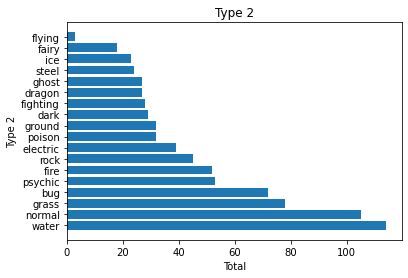

In [73]:
# Plot para observar variaciones
fig, ax = plt.subplots()

ax.scatter()


ax.set(title="Type 2",
        xlabel="Total",
        ylabel="Type 2");

**Question 4: Which type is the most likely to be a legendary Pokemon?**

In [84]:
leg = df_tmp[df_tmp["is_legendary"]==True]
leg[leg["type1"]=="psychic"].T

,149,150,248,250,385,479,480,481,487,493,719,785,788,789,790,791,799
abilities,"['Pressure', 'Unnerve']",['Synchronize'],"['Pressure', 'Multiscale']",['Natural Cure'],['Pressure'],['Levitate'],['Levitate'],['Levitate'],['Levitate'],['Victory Star'],['Magician'],"['Psychic Surge', 'Telepathy']",['Unaware'],['Sturdy'],['Full Metal Body'],['Shadow Shield'],['Prism Armor']
against_bug,2,2,1,4,2,2,2,2,2,1,1,1,2,2,1,1,2
against_dark,2,2,2,2,2,2,2,2,2,2,4,1,2,2,2,4,2
against_dragon,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0.5,1,1
against_electric,1,1,2,0.5,1,1,1,1,1,1,1,1,1,1,1,1,1
against_fairy,1,1,1,1,1,1,1,1,1,0.5,1,1,1,1,0.5,1,1
against_fight,0.5,0.5,0.25,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0,0.25,0.5,0.5,1,0,0.5
against_fire,1,1,1,2,1,1,1,1,1,0.5,1,1,1,1,2,1,1
against_flying,1,1,1,2,1,1,1,1,1,1,1,1,1,1,0.5,1,1
against_ghost,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,4,2


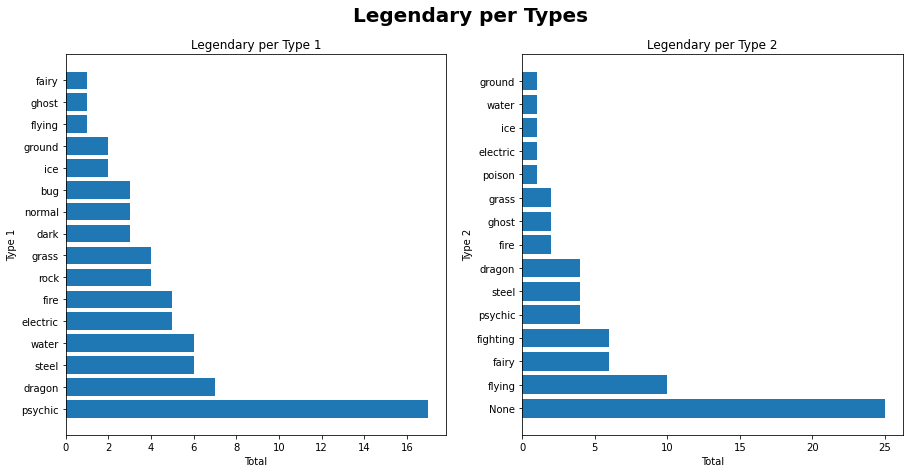

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

ax[0].barh(y=leg["type1"].value_counts().keys(),
           width=leg["type1"].value_counts().values)

ax[0].set(title="Legendary per Type 1",
          xlabel="Total",
          ylabel="Type 1")

ax[1].barh(y=leg["type2"].value_counts().keys(),
           width=leg["type2"].value_counts().values);
ax[1].set(title="Legendary per Type 2",
          xlabel="Total",
          ylabel="Type 2")

fig.suptitle("Legendary per Types", fontsize=20, fontweight="bold", y=0.975, x=0.5);

Los tipo psíquicos tienden a ser los legendarios.

**Question 6: Can you build a Pokemon dream team? A team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon.**